## Import Libraries

In [1]:
import warnings 
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

## Data Importing

In [2]:
df = pd.read_csv("C:/Machine Learning/Predictive Maintenence/train/train.csv")

## Exploratory Data Analysis(EDA)

In [3]:
df.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0


Checking for null values

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136429 entries, 0 to 136428
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       136429 non-null  int64  
 1   Product ID               136429 non-null  object 
 2   Type                     136429 non-null  object 
 3   Air temperature [K]      136429 non-null  float64
 4   Process temperature [K]  136429 non-null  float64
 5   Rotational speed [rpm]   136429 non-null  int64  
 6   Torque [Nm]              136429 non-null  float64
 7   Tool wear [min]          136429 non-null  int64  
 8   Machine failure          136429 non-null  int64  
 9   TWF                      136429 non-null  int64  
 10  HDF                      136429 non-null  int64  
 11  PWF                      136429 non-null  int64  
 12  OSF                      136429 non-null  int64  
 13  RNF                      136429 non-null  int64  
dtypes: f

In [5]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,136429.0,NaN,NaN,NaN,68214.0,39383.804275,0.0,34107.0,68214.0,102321.0,136428.0
Product ID,136429,9976,L53257,139,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Type,136429,3,L,95354,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Air temperature [K],136429.0,NaN,NaN,NaN,299.862776,1.862247,295.3,298.3,300.0,301.2,304.4
Process temperature [K],136429.0,NaN,NaN,NaN,309.94107,1.385173,305.8,308.7,310.0,310.9,313.8
Rotational speed [rpm],136429.0,NaN,NaN,NaN,1520.33111,138.736632,1181.0,1432.0,1493.0,1580.0,2886.0
Torque [Nm],136429.0,NaN,NaN,NaN,40.348643,8.502229,3.8,34.6,40.4,46.1,76.6
Tool wear [min],136429.0,NaN,NaN,NaN,104.408901,63.96504,0.0,48.0,106.0,159.0,253.0
Machine failure,136429.0,NaN,NaN,NaN,0.015744,0.124486,0.0,0.0,0.0,0.0,1.0
TWF,136429.0,NaN,NaN,NaN,0.001554,0.039389,0.0,0.0,0.0,0.0,1.0


In [6]:
display(df.columns.tolist())

['id',
 'Product ID',
 'Type',
 'Air temperature [K]',
 'Process temperature [K]',
 'Rotational speed [rpm]',
 'Torque [Nm]',
 'Tool wear [min]',
 'Machine failure',
 'TWF',
 'HDF',
 'PWF',
 'OSF',
 'RNF']

In [7]:
pd.DataFrame(data= {'Number': df['Machine failure'].value_counts(), 
                    'Percent': df['Machine failure'].value_counts(normalize=True)})

,Number,Percent
0,134281,0.984256
1,2148,0.015744


In [8]:
display(df.nunique())

id                         136429
Product ID                   9976
Type                            3
Air temperature [K]            95
Process temperature [K]        81
Rotational speed [rpm]        952
Torque [Nm]                   611
Tool wear [min]               246
Machine failure                 2
TWF                             2
HDF                             2
PWF                             2
OSF                             2
RNF                             2
dtype: int64

Drop the indices as these have no predictive power

In [10]:
train = df.copy()

In [11]:
train.pop("Machine failure")

0         0
1         0
2         0
3         0
4         0
         ..
136424    0
136425    0
136426    0
136427    0
136428    0
Name: Machine failure, Length: 136429, dtype: int64

In [12]:
train.pop('id')

0              0
1              1
2              2
3              3
4              4
           ...  
136424    136424
136425    136425
136426    136426
136427    136427
136428    136428
Name: id, Length: 136429, dtype: int64

In [13]:
features = train.columns.tolist()

# Categorical features
cat_features = ['Product ID', 'Type']

# Binary features
bin_features = ['TWF', 'HDF', 'PWF', 'OSF', 'RNF']

# Numerical features
num_features = [f for f in features if f not in (cat_features + bin_features)]

print('Number of Categorical_features:', len(cat_features)) 
print('Number of Binary_features:', len(bin_features))  
print('Number of Numerical_features:', len(num_features))
print(num_features)
print("")
print('The total number of features:', len(features))
print(features)

Number of Categorical_features: 2
Number of Binary_features: 5
Number of Numerical_features: 5
['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']

The total number of features: 12
['Product ID', 'Type', 'Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF']


Checking the percentages of values in columns 

In [14]:
for f in cat_features:
    print('\t' , f)
    n_f = train[f].value_counts()
    p_f = train[f].value_counts(normalize=True)
    display(pd.DataFrame(data= {'Number': n_f, 'Percent': p_f}))

	 Product ID


,Number,Percent
L53257,139,0.001019
L49056,131,0.000960
L53271,131,0.000960
L54275,120,0.000880
L48892,120,0.000880
...,...,...
M24614,1,0.000007
H39399,1,0.000007
M15853,1,0.000007
H32637,1,0.000007


	 Type


,Number,Percent
L,95354,0.698928
M,32152,0.235668
H,8923,0.065404


In [15]:
dfv = pd.DataFrame(data= {'Value': ['Number 0', 'Percent 0', '', 'Number 1', 'Percent 1']})

for f in bin_features: 
    n_f = train[f].value_counts()
    p_f = train[f].value_counts(normalize=True)
    dfv[f] = [n_f[0], p_f[0], '', n_f[1], p_f[1]]
    
dfv.set_index('Value')

,TWF,HDF,PWF,OSF,RNF
Value,,,,,
Number 0,136217,135725,136102,135889,136121
Percent 0,0.998446,0.99484,0.997603,0.996042,0.997742
,,,,,
Number 1,212,704,327,540,308
Percent 1,0.001554,0.00516,0.002397,0.003958,0.002258


<function matplotlib.pyplot.show(close=None, block=None)>

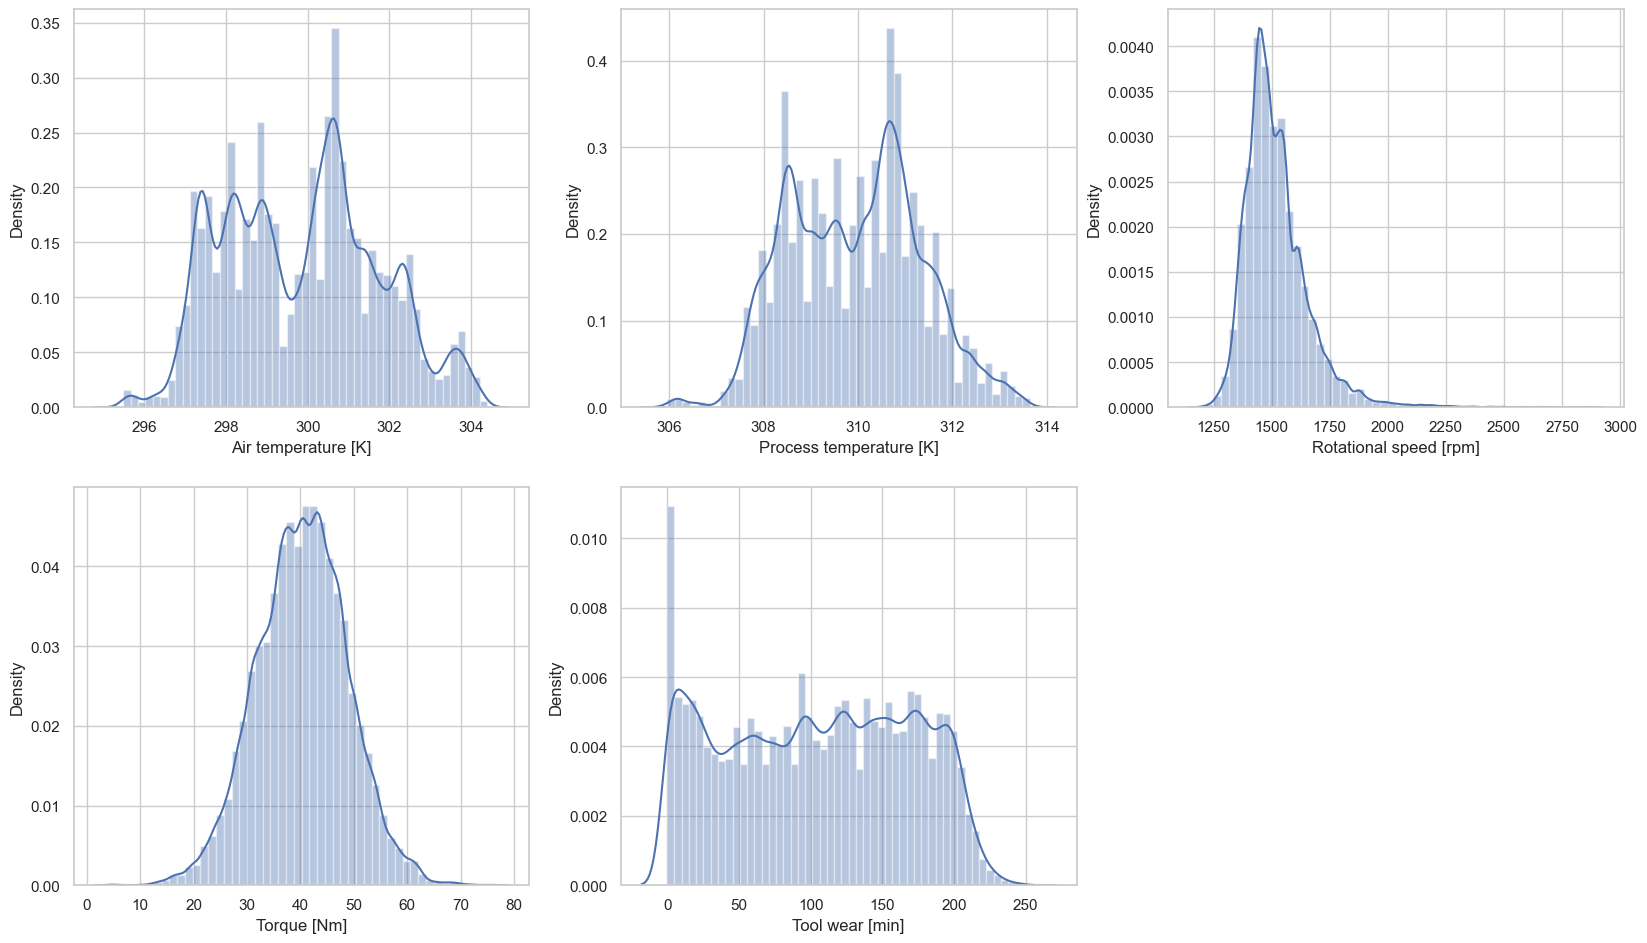

In [16]:
sns.set_theme(style='whitegrid')
plt.figure(figsize=(20,30))
plotnumber = 1

for column in num_features:
    if plotnumber<=(len(num_features)): 
        ax = plt.subplot(5,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize=12)
    plotnumber +=1
plt.show

#### Some columns in the dataset are normally distributed("Rotational speed [rpm]", "Torque[Nm]")

In [17]:
#function to visualize the binary machine failures
def plot_binary_machine_failures(dataframe, column):
    # Plot the machine failures
    plt.figure(figsize=(8, 5))

    # Countplot for Machine failure
    ax = plt.subplot(1, 2, 1)
    ax = sns.countplot(x=column, data=dataframe)
    ax.bar_label(ax.containers[0])
    plt.title(column + " Failure", fontsize=20)

    # Pie chart for Outcome
    ax = plt.subplot(1, 2, 2)
    outcome_counts = dataframe[column].value_counts()
    ax = outcome_counts.plot.pie(explode=[0.1, 0.1], autopct='%1.2f%%', shadow=True)
    ax.set_title("Outcome", fontsize=12, color='Red', font='Lucida Calligraphy')

    # Display the plot
    plt.tight_layout()
    plt.show()

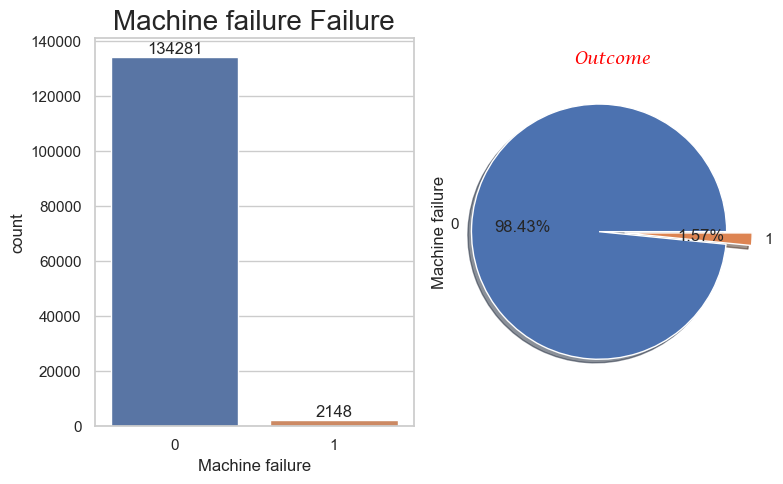

In [18]:
# Visualize the machine failure
plot_binary_machine_failures(df, 'Machine failure')

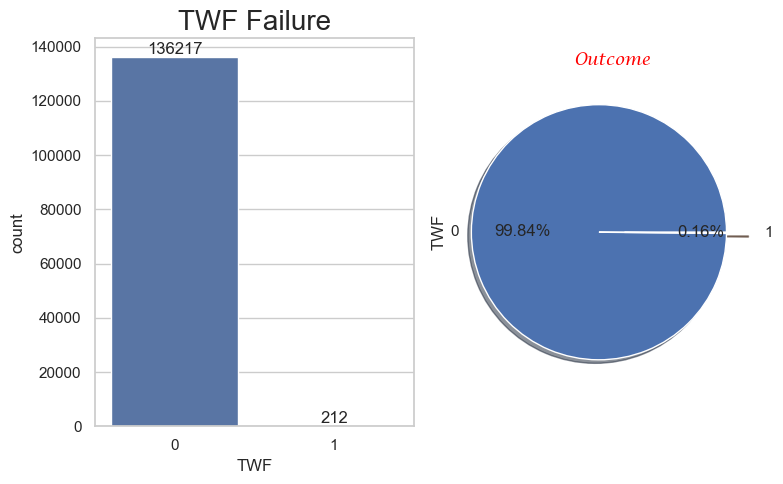

In [19]:
plot_binary_machine_failures(df, 'TWF')

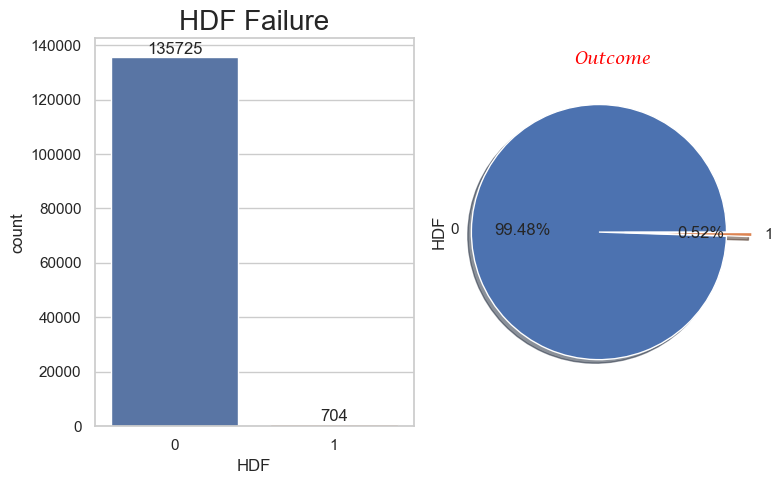

In [20]:
plot_binary_machine_failures(df, 'HDF')

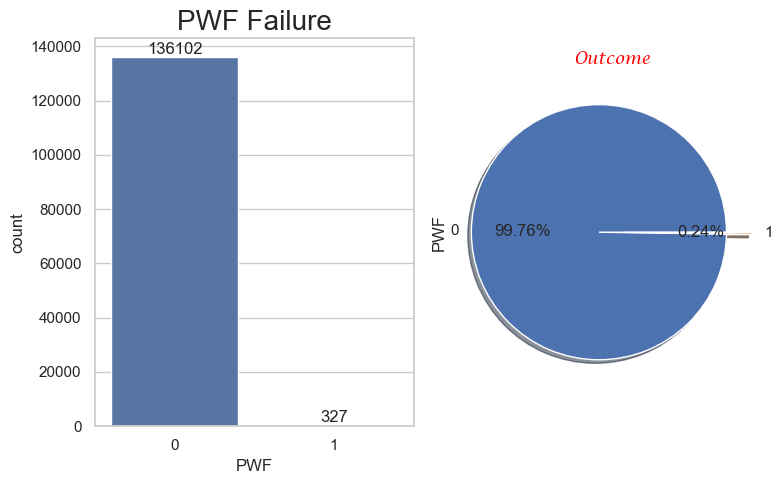

In [21]:
plot_binary_machine_failures(df, 'PWF')

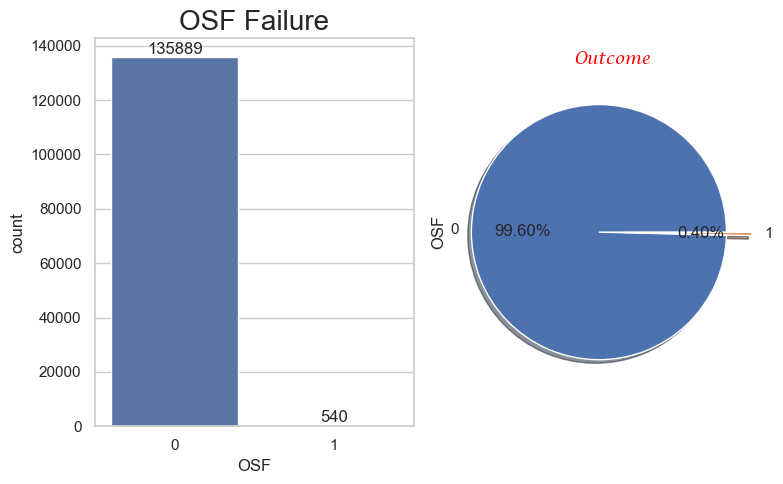

In [22]:
plot_binary_machine_failures(train, 'OSF')

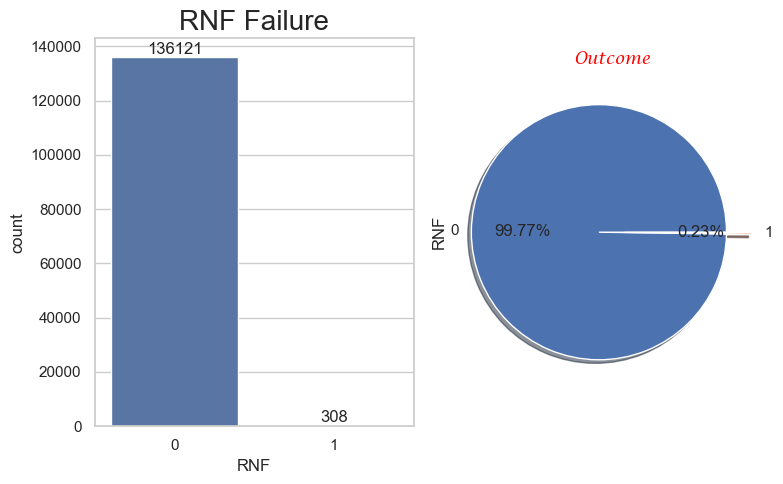

In [23]:
plot_binary_machine_failures(train, 'RNF')

#### From the above analysis, it can be seen that the dataset is highly imbalanced.

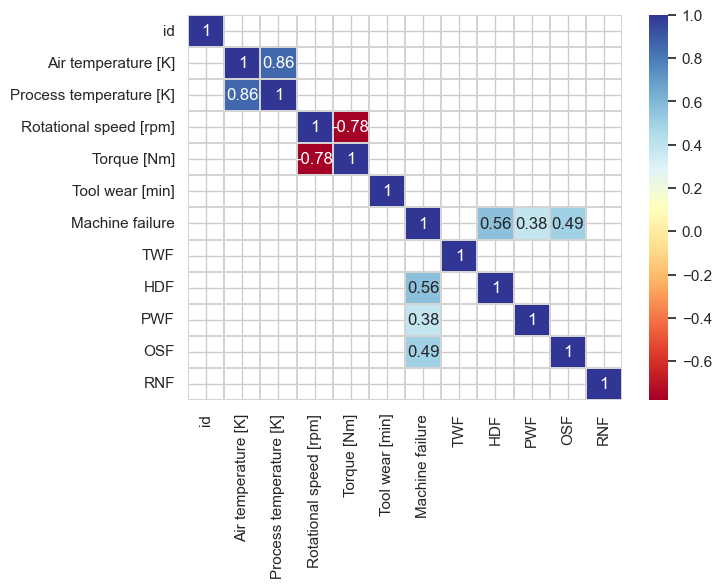

In [48]:
plt.figure(figsize=(7,5))
threshold = 0.35
sns.set_style("whitegrid", {"axes.facecolor": ".0"})
df_cluster = df.corr()
mask = df_cluster.where((abs(df_cluster) >= threshold)).isna()
plot_kws={"s": 1}
sns.heatmap(df_cluster,
            cmap='RdYlBu',
            annot=True,
            mask=mask,
            linewidths=0.2, 
            linecolor='lightgrey').set_facecolor('white')

From the graph, we can see there are strongly correlated features namely "Process temperature and Air temperature" and  "Torque and rotational speed".

## Feature Engineering

In [25]:
### normalizing the data

from sklearn.preprocessing import StandardScaler, LabelEncoder
scaler = StandardScaler()

df[num_features] = scaler.fit_transform(df[num_features])

#### Encoding

In [26]:
df_1 = df.drop(['Product ID'] , axis=1)
feature = ['Type']
df_1 = pd.get_dummies(df_1, columns=feature)
df_1.head()

,id,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,Type_H,Type_L,Type_M
0,0,0.395880,-0.246230,0.545416,-0.499711,0.556417,0,0,0,0,0,0,0,1,0
1,1,1.469856,1.558605,1.720308,-1.323028,1.494433,0,0,0,0,0,0,0,0,1
2,2,-0.302204,-1.040358,2.051873,-1.628831,-1.241447,0,0,0,0,0,0,0,1,0
3,3,0.610675,0.692284,0.026445,0.464745,1.447532,0,0,0,0,0,0,0,1,0
4,4,-1.000288,-0.679391,0.869773,-0.582043,-1.100744,0,0,0,0,0,0,0,0,1


## Modelling and  Evaluation

In [27]:
X = df_1.drop(columns= ['Machine failure'],axis = 1)
Y = df_1['Machine failure']

In [28]:
from sklearn.model_selection import train_test_split
x_train1,x_test1,y_train,y_test = train_test_split(X,Y,test_size = 0.20,random_state = 70)

x_train = x_train1.drop('id', axis=1)
x_test = x_test1.drop('id', axis=1)
x_train.shape, y_test.shape

((109143, 13), (27286,))

### Model Building

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [30]:
model1 = LogisticRegression()
model2 = RandomForestClassifier()
model3 = DecisionTreeClassifier()
model4 = SVC(kernel='linear', random_state=42)

In [31]:
## Logistic Regression
# training the model 
model1.fit(x_train, y_train)

# Preprocessing of validation data, get predictions
preds1 = model1.predict(x_test)
# Evaluate the model
score1 = mean_absolute_error(y_test, preds1)
print('MAE:', score1)
accuracy_score(y_test, preds1)

MAE: 0.0034449901048156564


0.9965550098951843

In [32]:
##RandomForestClassifier
model2.fit(x_train, y_train)

# Preprocessing of validation data, get predictions
preds2 = model2.predict(x_test)
# Evaluate the model
score2 = mean_absolute_error(y_test, preds2)
print('MAE:', score2)
accuracy_score(y_test, preds2)

MAE: 0.003371692443011068


0.996628307556989

In [33]:
##DecisionTreeClassifier
model3.fit(x_train, y_train)

# Preprocessing of validation data, get predictions
preds3 = model3.predict(x_test)
# Evaluate the model
score3 = mean_absolute_error(y_test, preds3)
print('MAE:', score3)
accuracy_score(y_test, preds3)

MAE: 0.006743384886022136


0.9932566151139779

In [34]:
##SVC
model4.fit(x_train, y_train)

# Preprocessing of validation data, get predictions
preds4 = model4.predict(x_test)
# Evaluate the model
score4 = mean_absolute_error(y_test, preds4)
print('MAE:', score1)
accuracy_score(y_test, preds4)

MAE: 0.0034449901048156564


0.9966649563878912

In [35]:
columns = ['id', 'Machine Failure']
values = [x_test1['id'], preds4]
submission_df=pd.DataFrame(dict(zip(columns, values)))
submission_df.to_csv( 'submission.csv' ,index=False,header=True)
print(submission_df.shape)

(27286, 2)


### Visualising the best classifier i.e, SVM

Creating a confusion matrix to visualize the performance of SVM model. A confusion matrix is a performance evaluation tool in machine learning, representing the accuracy of a classification model. It displays the number of true positives, true negatives, false positives, and false negatives.

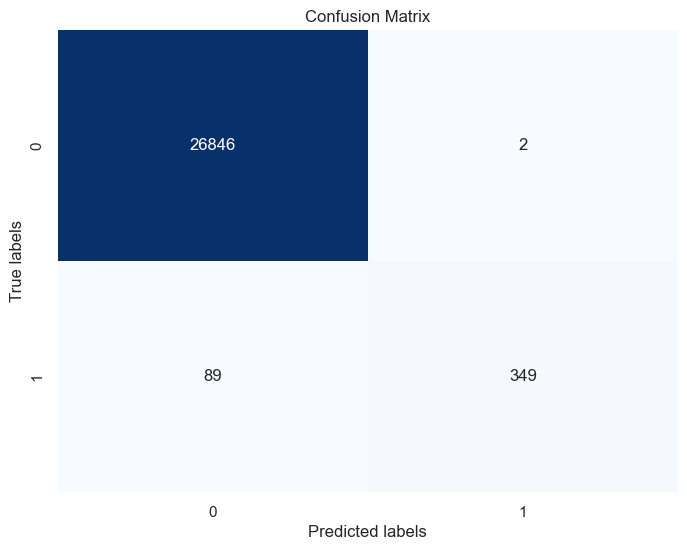

In [36]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, preds4)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

For binary classification, where you have two classes (e.g., positive and negative), a common and effective way to visualize the performance of your model is by using a Receiver Operating Characteristic (ROC) curve and an Area Under the Curve (AUC) plot. These plots provide insights into the trade-off between true positive rate (sensitivity) and false positive rate (1 - specificity) at different classification thresholds.

In [37]:
from sklearn.metrics import roc_curve, roc_auc_score

By setting probability=True when creating the SVM classifier, you enable the model to compute class probabilities, allowing you to use predict_proba to obtain the predicted probabilities for each class.

In [38]:
# Creating an SVM classifier with probability=True
model5 = SVC(kernel='linear', probability=True, random_state=42)

# Train the SVM classifier
model5.fit(x_train, y_train)

# Get predicted probabilities for the positive class
y_prob = model5.predict_proba(x_test)[:, 1]

In [43]:
y_prob

array([0.00391144, 0.00390774, 0.0039091 , ..., 0.00391209, 0.00391046,
       0.00391234])

In [44]:
# Calculating false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculating AUC score
auc_score = roc_auc_score(y_test, y_prob)

In [45]:
auc_score

0.939998931920475

Plotting the ROC curve to visualize the trade-off between true positive rate and false positive rate at different classification thresholds.

This code will generate an ROC curve plot with the AUC score displayed in the legend. The diagonal dashed line represents random guessing, and a higher AUC score indicates better model performance.

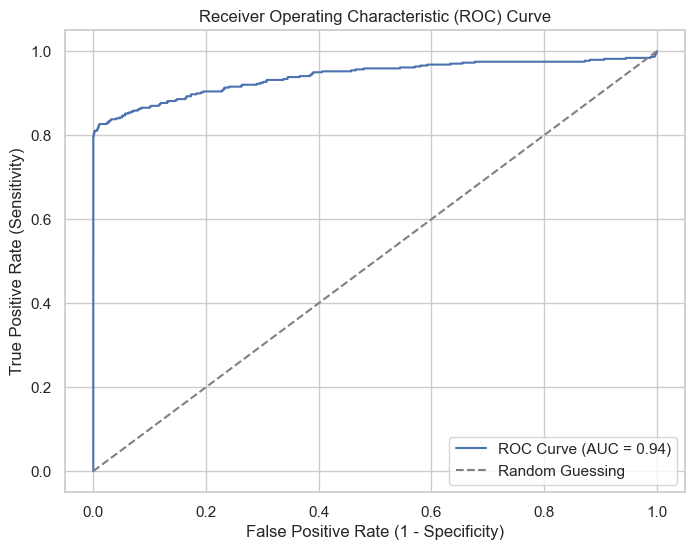

In [46]:
# Plot ROC curve
sns.set_theme(style = 'whitegrid')
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], '--', color='gray', label='Random Guessing')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()